In [1]:
import librosa

In [2]:
def load_audio_file(file_path):
    audio, sample_rate = librosa.load(file_path, sr=None)  # sr=None preserves the original sample rate
    return audio, sample_rate
    

In [1]:
import os
import numpy as np
import librosa

def load_audio_file(file_path):
    try:
        y, sr = librosa.load(file_path, sr=22050)
        return y, sr
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None, None

def extract_audio_features(audio, sr):
    if audio is None or sr is None:
        return None

    try:
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
        mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
        
        # Compute mean of features to obtain fixed-size vectors
        mfcc_mean = np.mean(mfcc.T, axis=0)
        mel_spectrogram_mean = np.mean(mel_spectrogram.T, axis=0)
        
        # Concatenate all feature vectors into one feature vector
        combined_features = np.concatenate([mfcc_mean, mel_spectrogram_mean])
        
        return combined_features

    except Exception as e:
        print(f"Error processing audio features: {e}")
        return None

def process_audio_files(audio_dir):
    features = []
    processed_files = 0
    total_files = len([f for f in os.listdir(audio_dir) if f.endswith(".mp3")])

    for file_name in os.listdir(audio_dir):
        if file_name.endswith(".mp3"):
            file_path = os.path.join(audio_dir, file_name)
            print(f"Processing file: {file_name}")
            
            # Load and process audio file
            audio, sr = load_audio_file(file_path)
            combined_features = extract_audio_features(audio, sr)
            
            if combined_features is not None:
                features.append(combined_features)
            else:
                print(f"Skipping file due to error: {file_name}")
            
            # Clear memory by deleting audio and combined_features
            del audio, sr, combined_features

            # Update progress
            processed_files += 1
            print(f"Processed {processed_files}/{total_files} files")
    
    features = np.array(features)
    return features

audio_dir = 'audio_files'
features = process_audio_files(audio_dir)

print("Features shape: ", features.shape)


Processing file: audio_444.mp3.mp3
Processed 1/497 files
Processing file: audio_454.mp3.mp3
Processed 2/497 files
Processing file: audio_369.mp3.mp3
Processed 3/497 files
Processing file: audio_211.mp3.mp3
Processed 4/497 files
Processing file: audio_379.mp3.mp3
Processed 5/497 files
Processing file: audio_201.mp3.mp3
Processed 6/497 files
Processing file: audio_177.mp3.mp3
Processed 7/497 files
Processing file: audio_167.mp3.mp3
Processed 8/497 files
Processing file: audio_73.mp3.mp3
Processed 9/497 files
Processing file: audio_63.mp3.mp3
Processed 10/497 files
Processing file: audio_11.mp3.mp3
Processed 11/497 files
Processing file: audio_115.mp3.mp3
Processed 12/497 files
Processing file: audio_105.mp3.mp3
Processed 13/497 files
Processing file: audio_273.mp3.mp3
Processed 14/497 files
Processing file: audio_263.mp3.mp3
Processed 15/497 files
Processing file: audio_426.mp3.mp3
Processed 16/497 files
Processing file: audio_436.mp3.mp3
Processed 17/497 files
Processing file: audio_297

In [2]:
from sklearn.mixture import GaussianMixture
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

labels = [0, 1, 2, ...]  

gmm_model = GaussianMixture(n_components=3, covariance_type='full')
gmm_model.fit(features, labels)

predicted_labels = gmm_model.predict(features)

X_train = np.expand_dims(features, axis=1)

y_train = np.random.randint(0, 3, size=(497,))  

model = Sequential()
model.add(GRU(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)




Python(38207) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
/Users/anishajani/myenv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3122 - loss: 1.1819 - val_accuracy: 0.3300 - val_loss: 1.2026
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3933 - loss: 1.0743 - val_accuracy: 0.3200 - val_loss: 1.1416
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4451 - loss: 1.0229 - val_accuracy: 0.3300 - val_loss: 1.1771
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4799 - loss: 1.0173 - val_accuracy: 0.3800 - val_loss: 1.1595
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5894 - loss: 0.9376 - val_accuracy: 0.3400 - val_loss: 1.2019
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5742 - loss: 0.9156 - val_accuracy: 0.3800 - val_loss: 1.1520
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5800 - loss: 0.9195 - val_accuracy: 0.4000 - val_loss: 1.1878
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5861 - loss: 0.9155 - val_accuracy: 0.3000 - val_loss:

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8642 - loss: 0.4166 - val_accuracy: 0.3100 - val_loss: 1.4363
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8844 - loss: 0.4342 - val_accuracy: 0.3500 - val_loss: 1.4200
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8684 - loss: 0.4348 - val_accuracy: 0.3300 - val_loss: 1.4699
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8828 - loss: 0.3813 - val_accuracy: 0.3700 - val_loss: 1.4303
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8996 - loss: 0.3664 - val_accuracy: 0.3400 - val_loss: 1.4865
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8518 - loss: 0.4135 - val_accuracy: 0.3300 - val_loss: 1.5260
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8928 - loss: 0.3836 - val_accuracy: 0.3600 - val_loss: 1.4660
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8858 - loss: 0.4118 - val_accuracy: 0.3500 - val_loss

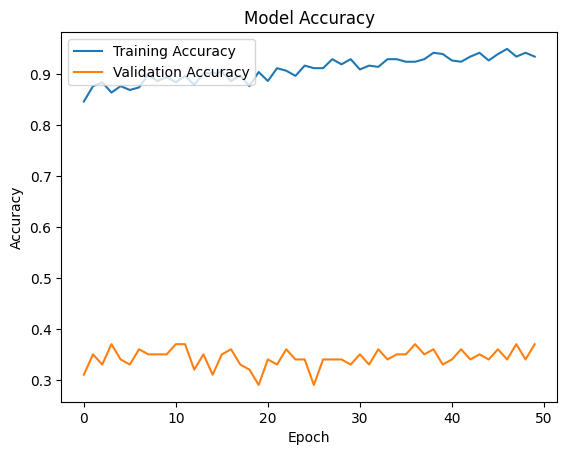

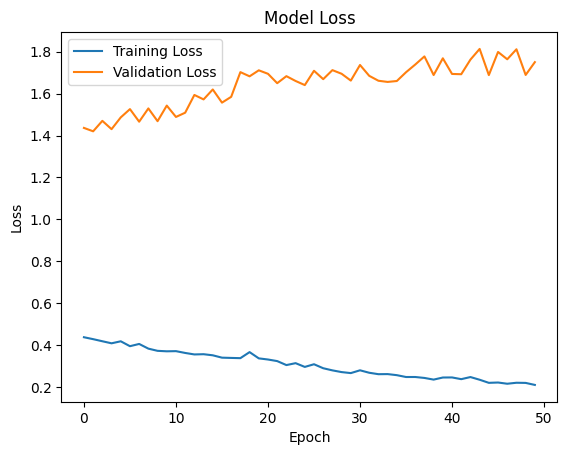

In [3]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()
